Cuaderno correspondiente a las predicciones 1 y 2.



In [1]:
#Comentar las siguientes líneas para ejecutar el siguiente script fuera de GoogleColab
#from google.colab import drive
#drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#cd '/content/gdrive/My Drive/Inteligencia de Negocio/Prácticas/P3'

/content/gdrive/My Drive/Inteligencia de Negocio/Prácticas/P3


## Preprocesamiento

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Manipulación básica de los datos

In [4]:
rd = pd.read_csv("train.csv", na_values='')
rd_test = pd.read_csv("test.csv", na_values='')

In [5]:
rd

,id,Nombre,Ciudad,Año,Kilometros,Combustible,Tipo_marchas,Mano,Consumo,Motor_CC,Potencia,Asientos,Descuento,Precio_cat
0,1.0,Maruti Swift Dzire ZDI,G,2012.0,83000.0,Diesel,Manual,First,23.4 kmpl,1248 CC,74 bhp,5.0,NaN,3
1,2.0,Maruti Wagon R LXI Optional,I,2016.0,4800.0,Petrol,Manual,First,20.51 kmpl,998 CC,67.04 bhp,5.0,NaN,3
2,3.0,Mahindra KUV 100 mFALCON D75 K8,F,2016.0,26000.0,Diesel,Manual,First,25.32 kmpl,1198 CC,77 bhp,6.0,NaN,3
3,4.0,Hyundai i20 1.2 Magna,E,2013.0,56127.0,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,NaN,3
4,5.0,Honda Jazz 1.2 SV i VTEC,H,2017.0,41981.0,Petrol,Manual,First,18.7 kmpl,1199 CC,88.7 bhp,5.0,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4814,4815.0,Maruti Swift VDI,E,2014.0,83274.0,Diesel,Manual,First,22.9 kmpl,1248 CC,74 bhp,5.0,NaN,3
4815,NaN,Porsche Panamera Diesel 250hp,H,2014.0,60033.0,Diesel,Automatic,First,18.18 kmpl,2967 CC,250 bhp,4.0,NaN,5
4816,4817.0,Hyundai Creta 1.6 CRDi SX Option,C,2017.0,40158.0,Diesel,Manual,First,19.67 kmpl,NaN,126.2 bhp,5.0,NaN,4
4817,4818.0,Hyundai Xcent 1.2 VTVT S,E,2015.0,65743.0,Petrol,Manual,First,20.14 kmpl,1197 CC,81.86 bhp,5.0,7.85,3


In [21]:
d = rd.copy()
d_test = rd_test.copy()

In [22]:
d['Descuento'].count()

659

Borramos la columna "Descuento" porque la mayor parte de las veces no es conocida.

In [23]:
del d['Descuento']
del d['id']

del d_test['Descuento']
test_ids = d_test['id']
del d_test['id']

In [24]:
d['Ciudad'].nunique()

11

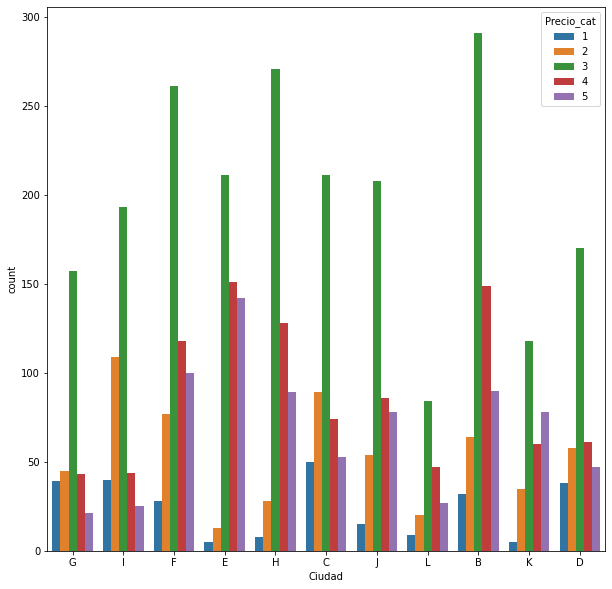

In [25]:
plt.figure(figsize=(10,10))
sns.countplot(data=d, x='Ciudad', hue='Precio_cat')

In [26]:
del d['Ciudad']
del d_test['Ciudad']  

In [27]:
d = d.dropna()

In [28]:
d.count()

Nombre          4059
Año             4059
Kilometros      4059
Combustible     4059
Tipo_marchas    4059
Mano            4059
Consumo         4059
Motor_CC        4059
Potencia        4059
Asientos        4059
Precio_cat      4059
dtype: int64

In [29]:
d

,Nombre,Año,Kilometros,Combustible,Tipo_marchas,Mano,Consumo,Motor_CC,Potencia,Asientos,Precio_cat
0,Maruti Swift Dzire ZDI,2012.0,83000.0,Diesel,Manual,First,23.4 kmpl,1248 CC,74 bhp,5.0,3
1,Maruti Wagon R LXI Optional,2016.0,4800.0,Petrol,Manual,First,20.51 kmpl,998 CC,67.04 bhp,5.0,3
2,Mahindra KUV 100 mFALCON D75 K8,2016.0,26000.0,Diesel,Manual,First,25.32 kmpl,1198 CC,77 bhp,6.0,3
3,Hyundai i20 1.2 Magna,2013.0,56127.0,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,3
4,Honda Jazz 1.2 SV i VTEC,2017.0,41981.0,Petrol,Manual,First,18.7 kmpl,1199 CC,88.7 bhp,5.0,3
...,...,...,...,...,...,...,...,...,...,...,...
4813,Volkswagen Vento Petrol Highline,2012.0,67200.0,Petrol,Manual,First,15.04 kmpl,1598 CC,103.6 bhp,5.0,3
4814,Maruti Swift VDI,2014.0,83274.0,Diesel,Manual,First,22.9 kmpl,1248 CC,74 bhp,5.0,3
4815,Porsche Panamera Diesel 250hp,2014.0,60033.0,Diesel,Automatic,First,18.18 kmpl,2967 CC,250 bhp,4.0,5
4817,Hyundai Xcent 1.2 VTVT S,2015.0,65743.0,Petrol,Manual,First,20.14 kmpl,1197 CC,81.86 bhp,5.0,3


In [30]:
def remove_units(s, n_chars):
  return float(s[0:-n_chars])

def remove_kmpl(s):
  return remove_units(s, 5)

def remove_cc(s):
  return remove_units(s, 3)

def remove_bhp(s):
  return remove_units(s, 4)

In [31]:
d['Consumo'] = d['Consumo'].map(remove_kmpl)
d['Motor_CC'] = d['Motor_CC'].map(remove_cc)
d['Potencia'] = d['Potencia'].map(remove_bhp)
d_test['Consumo'] = d_test['Consumo'].map(remove_kmpl)
d_test['Motor_CC'] = d_test['Motor_CC'].map(remove_cc)
d_test['Potencia'] = d_test['Potencia'].map(remove_bhp)

In [32]:
d['Nombre'].nunique()

1516

No merece la pena tener en cuenta los nombres de los modelos.Podemos tener en cuenta las marcas:

In [33]:
def brand_from_name(s):
  return s.split(' ', 1)[0].capitalize()

In [34]:
d['Nombre'] = d['Nombre'].map(brand_from_name)
d = d.rename(columns={'Nombre':'Marca'})

d_test['Nombre'] = d_test['Nombre'].map(brand_from_name)
d_test = d_test.rename(columns={'Nombre':'Marca'})

In [36]:
d['Marca'].nunique()

28

In [ ]:
d

,Nombre,Año,Kilometros,Combustible,Tipo_marchas,Mano,Consumo,Motor_CC,Potencia,Asientos,Precio_cat
0,Maruti Swift Dzire ZDI,2012.0,83000.0,Diesel,Manual,First,23.40,1248.0,74.00,5.0,3
1,Maruti Wagon R LXI Optional,2016.0,4800.0,Petrol,Manual,First,20.51,998.0,67.04,5.0,3
2,Mahindra KUV 100 mFALCON D75 K8,2016.0,26000.0,Diesel,Manual,First,25.32,1198.0,77.00,6.0,3
3,Hyundai i20 1.2 Magna,2013.0,56127.0,Petrol,Manual,First,18.50,1197.0,80.00,5.0,3
4,Honda Jazz 1.2 SV i VTEC,2017.0,41981.0,Petrol,Manual,First,18.70,1199.0,88.70,5.0,3
...,...,...,...,...,...,...,...,...,...,...,...
4813,Volkswagen Vento Petrol Highline,2012.0,67200.0,Petrol,Manual,First,15.04,1598.0,103.60,5.0,3
4814,Maruti Swift VDI,2014.0,83274.0,Diesel,Manual,First,22.90,1248.0,74.00,5.0,3
4815,Porsche Panamera Diesel 250hp,2014.0,60033.0,Diesel,Automatic,First,18.18,2967.0,250.00,4.0,5
4817,Hyundai Xcent 1.2 VTVT S,2015.0,65743.0,Petrol,Manual,First,20.14,1197.0,81.86,5.0,3


### Resampling

Vemos como de desbalanceados están los datos:

In [ ]:
from collections import Counter

In [ ]:
print(Counter(rd['Precio_cat']))
print(Counter(d['Precio_cat']))

Counter({3: 2211, 4: 978, 5: 759, 2: 602, 1: 269})
Counter({3: 1853, 4: 848, 5: 646, 2: 509, 1: 203})


(HACER OVERSAMPLING CON SMOTENC SEGUIDO DE UNDERSAMPLING CON TOMEK'S LINKS PARA LIMPIAR EL RESULTADO)

In [ ]:
from imblearn.over_sampling import SMOTENC
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
categorical_features = (0,3,4,5)

In [ ]:
X = d.loc[:, d.columns != 'Precio_cat']
y = d['Precio_cat']

In [ ]:
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=0)
X_res, y_res = smote_nc.fit_resample(X, y)
print('Dataset after resampling:')
print(sorted(Counter(y_res).items()))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Dataset after resampling:
[(1, 1853), (2, 1853), (3, 1853), (4, 1853), (5, 1853)]


Limpieza con Tomek's Links. Primero codificamos los datos categóricos.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
le = [ LabelEncoder() for _ in categorical_features ]
scaler = MinMaxScaler()
scaler_oh = MinMaxScaler()

In [ ]:
X_res[:,categorical_features]

array([['Maruti Swift Dzire ZDI', 'Diesel', 'Manual', 'First'],
       ['Maruti Wagon R LXI Optional', 'Petrol', 'Manual', 'First'],
       ['Mahindra KUV 100 mFALCON D75 K8', 'Diesel', 'Manual', 'First'],
       ...,
       ['Mercedes-Benz E-Class 2009-2013 E 220 CDI Avantgarde', 'Diesel',
        'Automatic', 'First'],
       ['Toyota Innova Crysta 2.4 VX MT', 'Petrol', 'Automatic', 'First'],
       ['Mini Cooper Convertible 1.6', 'Diesel', 'Automatic', 'First']],
      dtype=object)

In [ ]:
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])

ohe = ColumnTransformer(transformers=[('cat', categorical_transformer, categorical_features)])

ohe.fit( np.vstack((X_res,d_test.to_numpy())) )
X_oh = ohe.transform( X_res ).toarray()
X_oh = np.hstack( (X_oh,np.delete(X_res,categorical_features,axis=1)) )
X_oh = scaler_oh.fit_transform(X_oh)
X_oh

array([[0.        , 0.        , 0.        , ..., 0.11611463, 0.07569418,
        0.375     ],
       [0.        , 0.        , 0.        , ..., 0.06959434, 0.06245721,
        0.375     ],
       [0.        , 0.        , 0.        , ..., 0.10681057, 0.08139977,
        0.5       ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.25511723, 0.28472878,
        0.375     ],
       [0.        , 0.        , 0.        , ..., 0.44977325, 0.39590164,
        0.43907754],
       [0.        , 0.        , 0.        , ..., 0.28029451, 0.25174462,
        0.37254688]])

In [ ]:
for i, f in enumerate(categorical_features):
  le[i].fit( np.hstack((X_res[:,f],d_test.to_numpy()[:,f])) )   #<------- AQUÍ PONGO LA UNIÓN DEL X DE TRAIN Y EL DE TEST, PARA QUE APRENDA A CODIFICAR LAS DOS
  X_res[:,f] = le[i].transform(X_res[:,f])
X_res = scaler.fit_transform(X_res)

In [ ]:
###PARA DESHACER LA TRANSFORMACIÓN
#X_res[:,categorical_features] = scaler.inverse_transform(X_res[:,categorical_features])
#for i, f in enumerate(categorical_features):
#  X_res[:,f] = le[i].inverse_transform(X_res[:,f].astype(int))

In [ ]:
#tl_oh = SMOTETomek()
#X_oh, y_oh = tl_oh.fit_resample(X_oh, y_res)
#print('Resampled dataset shape %s' % Counter(y_oh))

In [ ]:
tl = TomekLinks()
X_res, y_res = tl.fit_resample(X_res, y_res)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 1853, 5: 1809, 4: 1712, 2: 1690, 3: 1646})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## XGBoost

YA SÍ QUE SÍ PROBAMOS CON EL PRIMER MODELO

In [ ]:
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [ ]:
n_splits = 5
kf = KFold(n_splits, shuffle=True, random_state=0)

In [ ]:
def train_test_gradientBoosting(X, y, n_estim=500, max_depth=5, lr=0.1, gamma=0, min_child_weight=1, max_delta_step=0, 
                                subsample=0.8, colsample_bytree=1, booster='gbtree'):
  mean_acc = 0.0
  for train_idx, test_idx in kf.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    gbClassifier = xgb.XGBClassifier(tree_method='gpu_hist', gpu_id=0, objective='multi:softmax', booster=booster, n_estimators=n_estim, 
                                     max_depth=max_depth, learning_rate=lr, gamma=gamma, min_child_weight=min_child_weight, 
                                     max_delta_step=max_delta_step, subsample=subsample, colsample_bytree=colsample_bytree, 
                                     colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, 
                                     base_score=0.5, sampling_method='gradient_based', grow_policy='lossguide')
    gbClassifier.fit(X_train, y_train)
    y_predict = gbClassifier.predict(X_test)
    mean_acc += accuracy_score(y_test, y_predict)
  mean_acc /= n_splits

  return mean_acc

In [ ]:
best_acc = 0.0
for booster in ('gbtree', 'gblinear'):
  for depth in (3,4,5,6,7):
    for lr in (0.05,0.1,0.15,0.2):
      for gamma in (0,0.5,1):
        for subsample in (0.5,0.7,0.8):
          for col_sample in (0.5,0.7,0.8,1):
            acc = train_test_gradientBoosting(X_res, y_res, n_estim=300, max_depth=depth, 
                                              subsample=subsample, lr=lr, colsample_bytree=col_sample, 
                                              gamma=gamma, booster=booster)
            if acc > best_acc:
              best_acc = acc
              print( "Mejor precisión encontrada para parámetros ",(booster,depth,lr,gamma,subsample,col_sample) )
              print( "Precisión:", acc )

Mejor precisión encontrada para parámetros  ('gbtree', 3, 0.05, 0, 0.5, 0.5)
Precisión: 0.8990815154994258
Mejor precisión encontrada para parámetros  ('gbtree', 3, 0.05, 0, 0.5, 0.7)
Precisión: 0.9002296211251435
Mejor precisión encontrada para parámetros  ('gbtree', 3, 0.05, 0, 0.5, 0.8)
Precisión: 0.9018369690011481
Mejor precisión encontrada para parámetros  ('gbtree', 3, 0.05, 0, 0.5, 1)
Precisión: 0.90195177956372
Mejor precisión encontrada para parámetros  ('gbtree', 3, 0.05, 0, 0.7, 0.5)
Precisión: 0.9020665901262916
Mejor precisión encontrada para parámetros  ('gbtree', 3, 0.05, 0, 0.7, 0.7)
Precisión: 0.9026406429391504
Mejor precisión encontrada para parámetros  ('gbtree', 3, 0.1, 0, 0.5, 0.5)
Precisión: 0.9215843857634903
Mejor precisión encontrada para parámetros  ('gbtree', 3, 0.1, 0, 0.5, 0.8)
Precisión: 0.9233065442020665
Mejor precisión encontrada para parámetros  ('gbtree', 3, 0.1, 0, 0.7, 0.8)
Precisión: 0.9235361653272101
Mejor precisión encontrada para parámetros  

## Redes Neuronales

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras.utils as np_utils
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [ ]:
def calcularAccuracy(labels, preds):
    labels = np.argmax(labels, axis = 1)
    preds = np.argmax(preds, axis = 1)
    accuracy = sum(labels == preds)/len(labels)
    return accuracy

def mostrarEvolucion(hist):
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training loss', 'Validation loss'])
    plt.show()
    
    acc = hist.history['accuracy']
    val_acc = hist.history['val_accuracy']
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training accuracy','Validation accuracy'])
    plt.show()

In [ ]:
data, labels = X_oh, y_oh

In [ ]:
def modelNN(n1, n2, n3, n4):
  initializer = keras.initializers.GlorotUniform()
  model = keras.Sequential()
  model.add(layers.Dense(n1, activation='relu', kernel_initializer=initializer,
                         input_dim=data.shape[1])
                        )
  if n2 > 0:
    model.add(layers.Dense(n2, activation='relu', kernel_initializer=initializer,
                         ))
  if n3 > 0:
    model.add(layers.Dense(n3, activation='relu', kernel_initializer=initializer,
                         ))
  model.add(layers.Dense(n4, activation='softmax', kernel_initializer=initializer,
                         ))
  return model

Epoch 1/50
691/691 [==============================] - 3s 3ms/step - loss: 0.9295 - accuracy: 0.6200 - val_loss: 0.5359 - val_accuracy: 0.7810
Epoch 2/50
691/691 [==============================] - 2s 3ms/step - loss: 0.4915 - accuracy: 0.7903 - val_loss: 0.5404 - val_accuracy: 0.7683
Epoch 3/50
691/691 [==============================] - 2s 3ms/step - loss: 0.4510 - accuracy: 0.8155 - val_loss: 0.4329 - val_accuracy: 0.8308
Epoch 4/50
691/691 [==============================] - 2s 3ms/step - loss: 0.4099 - accuracy: 0.8323 - val_loss: 0.4492 - val_accuracy: 0.8158
Epoch 5/50
691/691 [==============================] - 2s 3ms/step - loss: 0.3993 - accuracy: 0.8373 - val_loss: 0.4072 - val_accuracy: 0.8326
Epoch 6/50
691/691 [==============================] - 2s 3ms/step - loss: 0.3625 - accuracy: 0.8511 - val_loss: 0.4102 - val_accuracy: 0.8366
Epoch 7/50
691/691 [==============================] - 2s 3ms/step - loss: 0.3670 - accuracy: 0.8523 - val_loss: 0.3864 - val_accuracy: 0.8366
Epoch 

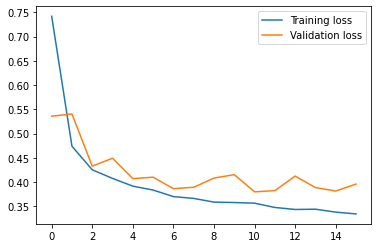

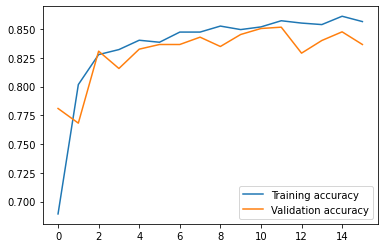

0.8505214368482039

In [ ]:
n1 = 350
n2 = 150
n3 = 0
n4 = 5

y_truth = np_utils.to_categorical(labels)[:,1:].astype(int)

X_train, X_test, y_train, y_test = train_test_split(data, y_truth, test_size=0.2, shuffle=True, random_state=0 )

model = modelNN(n1, n2, n3, n4)
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.Adam(learning_rate=0.0008), 
              metrics=['accuracy'])
hist = model.fit(X_train, y_train, 
                  batch_size=10, epochs=50, 
                  callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
                  validation_data=(X_test,y_test))
mostrarEvolucion(hist)
#model.fit(X_train, y_train, batch_size=10, epochs=30, validation_split=0.1)
y_predict = model.predict(X_test)
acc = calcularAccuracy(y_test, y_predict)

acc

In [ ]:
#mean_acc = 0.0
#for train_idx, test_idx in kf.split(X_oh):
#  X_train, X_test = X_oh[train_idx], X_oh[test_idx]
#  y_train, y_test = y_oh[train_idx], y_oh[test_idx]
#
#  gbClassifier = xgb.XGBClassifier(tree_method='gpu_hist', gpu_id=0, n_estimators=500, max_depth=5, objective='multi:softmax', )
#  gbClassifier.fit(X_train, y_train)
#  y_predict = gbClassifier.predict(X_test)
#  mean_acc += accuracy_score(y_test, y_predict)
#mean_acc /= n_splits
#
#mean_acc

## Entrenamiento final y predicción de test

REENTRENAMOS PARA TODO EL DATASET

In [ ]:
gbClassifier = xgb.XGBClassifier(tree_method='gpu_hist', gpu_id=0, n_estimators=500, max_depth=5, objective='multi:softmax')
gbClassifier.fit(X_res, y_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tree_method='gpu_hist', verbosity=1)

PREDECIMOS

In [ ]:
X_test = d_test.to_numpy()
for i, f in enumerate(categorical_features):
  X_test[:,f] = le[i].transform(X_test[:,f])
X_test = scaler.transform(X_test)

In [ ]:
y_predict = gbClassifier.predict(X_test)

In [ ]:
result = pd.DataFrame({'id':test_ids, 'Precio_cat':y_predict})

In [ ]:
#result.to_csv('resultados_2.csv', index=False)